Plotting line and data points with added noise

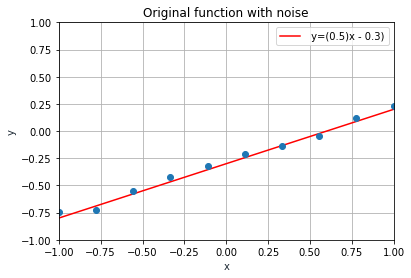

[-0.74199278 -0.72521535 -0.55388875 -0.41873408 -0.32373172 -0.20687972
 -0.13892077 -0.04856051  0.11729272  0.23346573]
[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


In [18]:
from scipy.stats import norm
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

slope = 0.5
intercept = -0.3


def random_line(m, b, sigma, size=10):
    xdata = np.linspace(-1.0,1.0,size)
    # Generate normally distributed random error ~ N(0, sigma**2)
    errors = scipy.stats.norm.rvs(loc=0, scale=sigma, size=size)
    ydata = m * xdata + b + errors
    return xdata, ydata

fig, ax = plt.subplots()

x = np.linspace(-1.0,1.0,10)
y = x*slope + intercept
plt.plot(x, y, '-r', label=" y=(0.5)x - 0.3)")
plt.title('Original function with noise')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper right')
plt.axis([-1, 1, -1, 1])
#New data with added noise
xs, ys = random_line(0.5, -0.3, 0.04, size=10)
ax.plot(xs, ys, 'o')
plt.grid()
plt.show()
print(ys)
print(xs)

Calculating Probability 


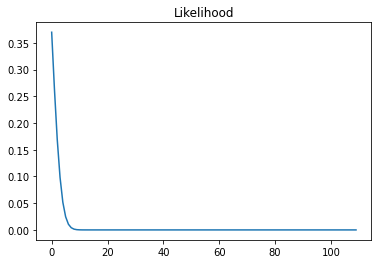

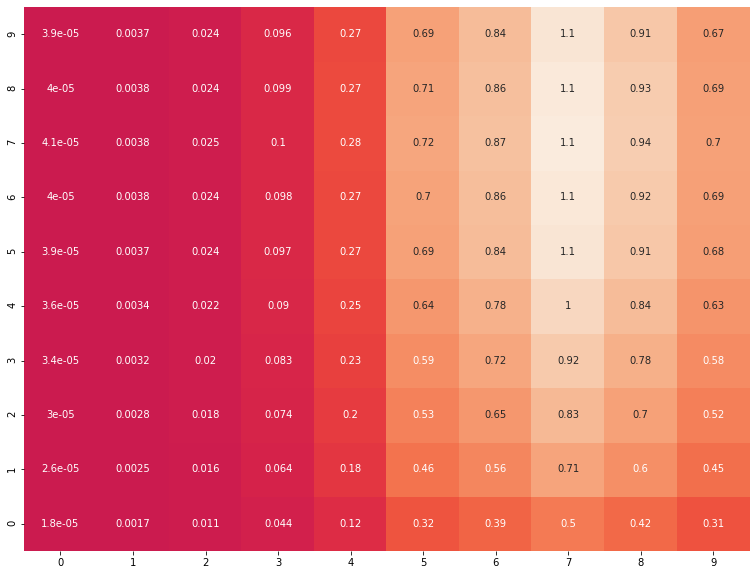

In [16]:
import math
import seaborn as sns

mu = 0
sig = 0.5
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

likelihood = [];
for i in range(0,110):
    y = gaussian(np.array(ys), i/10, 1)
    prod = np.prod(y)
    likelihood.append(prod)


xs.sort()
ys.sort()

plt.plot(likelihood)
plt.title("Likelihood")
xs.sort()
y.sort()


ll_grid=norm(0,0.2).pdf(ys)
p_grid=norm(0,0.71).pdf(ys)
ll_grid,p_grid=np.meshgrid(ll_grid,p_grid)

def prod(x,y):
    return np.multiply(x,y)

ll_p=prod(ll_grid,p_grid)
plt.figure(figsize=(13,10))
hm=sns.heatmap(ll_p,xticklabels=True, yticklabels=True,center=0,annot=True,cmap="rocket", cbar = False)
hm.invert_yaxis()